In [112]:
import numpy as np
import mappy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

In [7]:
fn = "/no_backup/enovoa/users/lpryszcz/cluster/rna_mods/N3Pseq/get_pt.all/zebrafish/cDNA123791.bam.tsv"
cols = ['read_id', 'barcode', 'pt_length', 'per_base', 'pt_start', 'pt_end', 'before_pt', 'pt_seq', 'score', 'identity', 'cigar', 
        'transcript_end', 'distance', 'transcript_id', 'assignment_type', 'additional_info']
df = pd.read_csv(fn, sep="\t", names=cols, skiprows=1); df.head()
fn1 = "/no_backup/enovoa/users/lpryszcz/cluster/rna_mods/N3Pseq/get_pt.all/zebrafish/cDNA897892.bam.tsv"
df1 = pd.read_csv(fn1, sep="\t", names=cols, skiprows=1); df1.head()

/tmp/ipykernel_2741564/2349801095.py:4: DtypeWarning: Columns (11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, sep="\t", names=cols, skiprows=1); df.head()


,read_id,barcode,pt_length,per_base,pt_start,pt_end,before_pt,pt_seq,score,identity,cigar,transcript_end,distance,transcript_id,assignment_type,additional_info
0,3d3d4087-cc18-4ee0-ac8e-59495d4c9aeb,EXP-NBD104_barcode06,5.1,2.3,94,96,TCGCTCTATC,TT,78,1.000,39=3S,NaN,NaN,.,intergenic,Classification=intergenic;
1,b6ec03fb-c92e-4021-b321-d71ef6b9ba66,EXP-NBD104_barcode05,18.6,1.8,89,99,CCTGTCGCTC,TTCTTCTTTT,74,0.952,2=1X30=1I8=,NaN,NaN,.,intergenic,Classification=intergenic;
2,250cb364-cf48-499e-8d4d-dc40fc5e0bde,EXP-NBD104_barcode06,28.9,2.2,92,120,TCGCTCTATC,TTCTTTTTTTTTTTTTTTTTTTTTTTTT,66,0.946,5S20=1D1X16=,NaN,NaN,.,intergenic,Classification=intergenic;
3,6ba9dccc-8e02-4659-9fed-2a916707f58a,EXP-NBD104_barcode06,4.6,2.1,92,94,CCGCTCTATC,TT,73,0.949,27=2D12=3S,NaN,NaN,ENSDART00000164359,inconsistent,gene_assignment=inconsistent; PolyA=False; Cla...
4,9b34027f-547e-4511-816f-cb5f017c8020,EXP-NBD104_barcode06,0.4,1.8,93,95,TCGCTCTATC,TT,73,0.974,11=1I27=3S,NaN,NaN,.,noninformative,*


'\nfig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 7))\nsns.boxplot(data=df[df.barcode.isin(barcodes)&df.transcript_end.isin(tes)], y="barcode", x="pt_length", hue="transcript_end", order=barcodes, hue_order=tes, ax=ax)\nsns.boxplot(data=df1[df1.barcode.isin(barcodes1)&df1.transcript_end.isin(tes)], y="barcode", x="pt_length", hue="transcript_end", order=barcodes1, hue_order=tes, ax=ax1)\n'

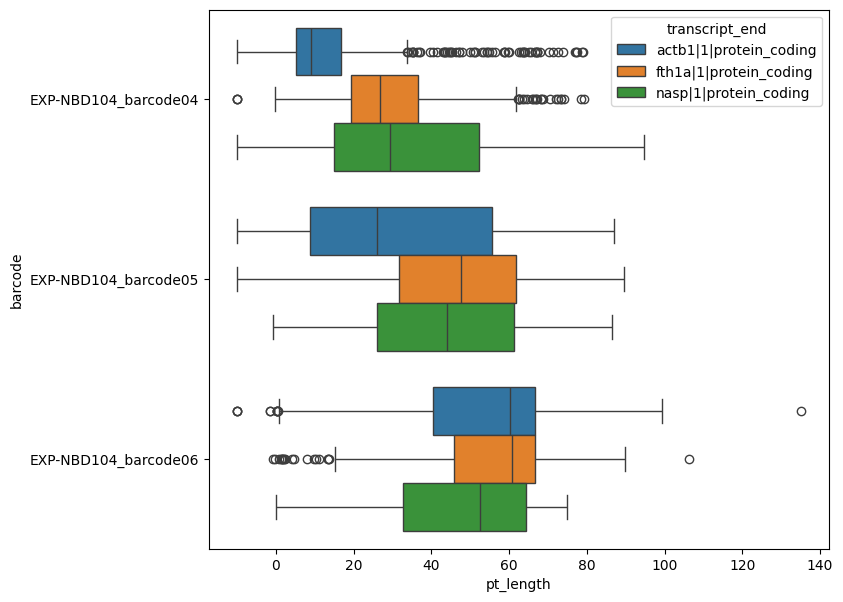

In [77]:
barcodes = ['EXP-NBD104_barcode04', 'EXP-NBD104_barcode05', 'EXP-NBD104_barcode06']
barcodes1 = ['EXP-NBD104_barcode01', 'EXP-NBD104_barcode02', 'EXP-NBD104_barcode03']

tes = ["actb1|1|protein_coding",  "fth1a|1|protein_coding", "nasp|1|protein_coding"]
# so so "hspa8|1|protein_coding" "hspb1|1|protein_coding",  "ppiaa|1|protein_coding", "ctsba|2|protein_coding" "actb2|1|protein_coding", "rpl11|1|protein_coding"
# stable
#"mt-cyb|2|protein_coding", "ctsla|1|protein_coding", "h1m|1|protein_coding", "rrm2|1|protein_coding"

fig, ax = plt.subplots(figsize=(8, 7))
sel = df.barcode.isin(barcodes)&df.transcript_end.isin(tes)&df["distance"]<10
sns.boxplot(data=df[sel], y="barcode", x="pt_length", hue="transcript_end", order=barcodes, hue_order=tes, ax=ax)

'''
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 7))
sel = df.barcode.isin(barcodes)&df.transcript_end.isin(tes)&df["distance"]<10
sns.boxplot(data=df[sel], y="barcode", x="pt_length", hue="transcript_end", order=barcodes, hue_order=tes, ax=ax)
sel1 = df1.barcode.isin(barcodes)&df1.transcript_end.isin(tes)&df1["distance"]<10
sns.boxplot(data=df1[sel1], y="barcode", x="pt_length", hue="transcript_end", order=barcodes1, hue_order=tes, ax=ax1)
'''

<Axes: xlabel='pt_length', ylabel='barcode'>

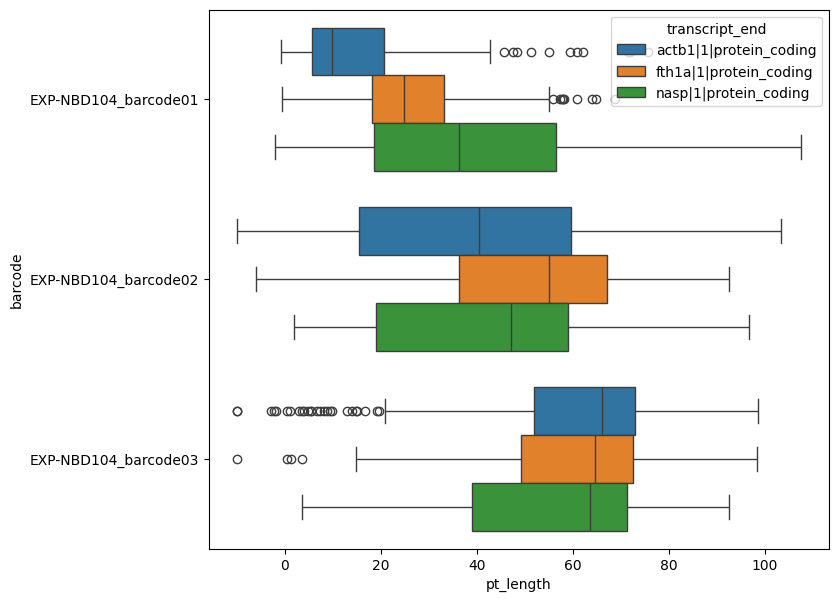

In [79]:
fig, ax = plt.subplots(figsize=(8, 7))
sel1 = df1.barcode.isin(barcodes)&df1.transcript_end.isin(tes)&df1["distance"]<10
sns.boxplot(data=df1[sel1], y="barcode", x="pt_length", hue="transcript_end", order=barcodes1, hue_order=tes, ax=ax)

<Axes: xlabel='distance', ylabel='Count'>

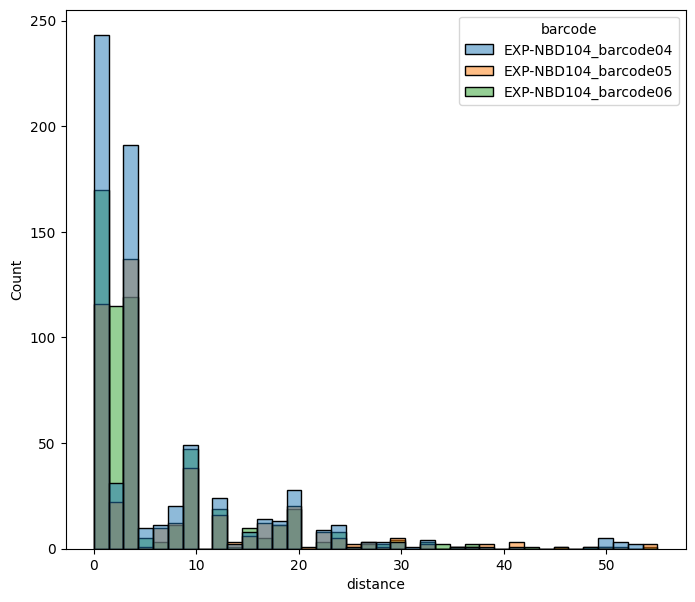

In [76]:
te = tes[0]; te
fig, ax = plt.subplots(figsize=(8, 7))
sns.histplot(data=df[df.transcript_end==te], x="distance", hue="barcode", hue_order=barcodes, ax=ax)


### Tail composition

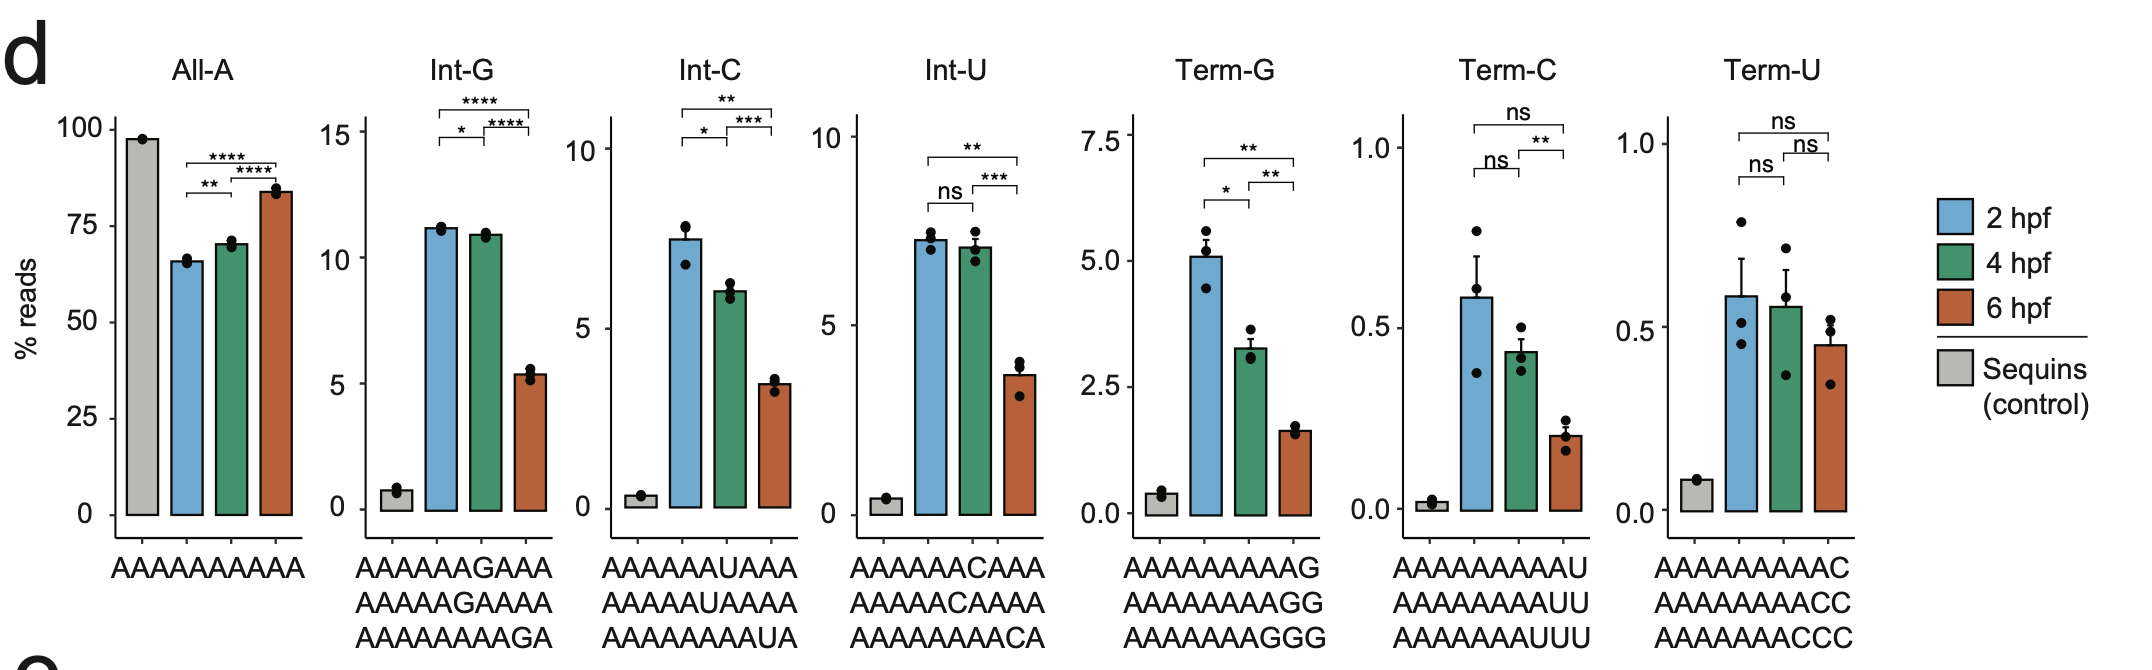
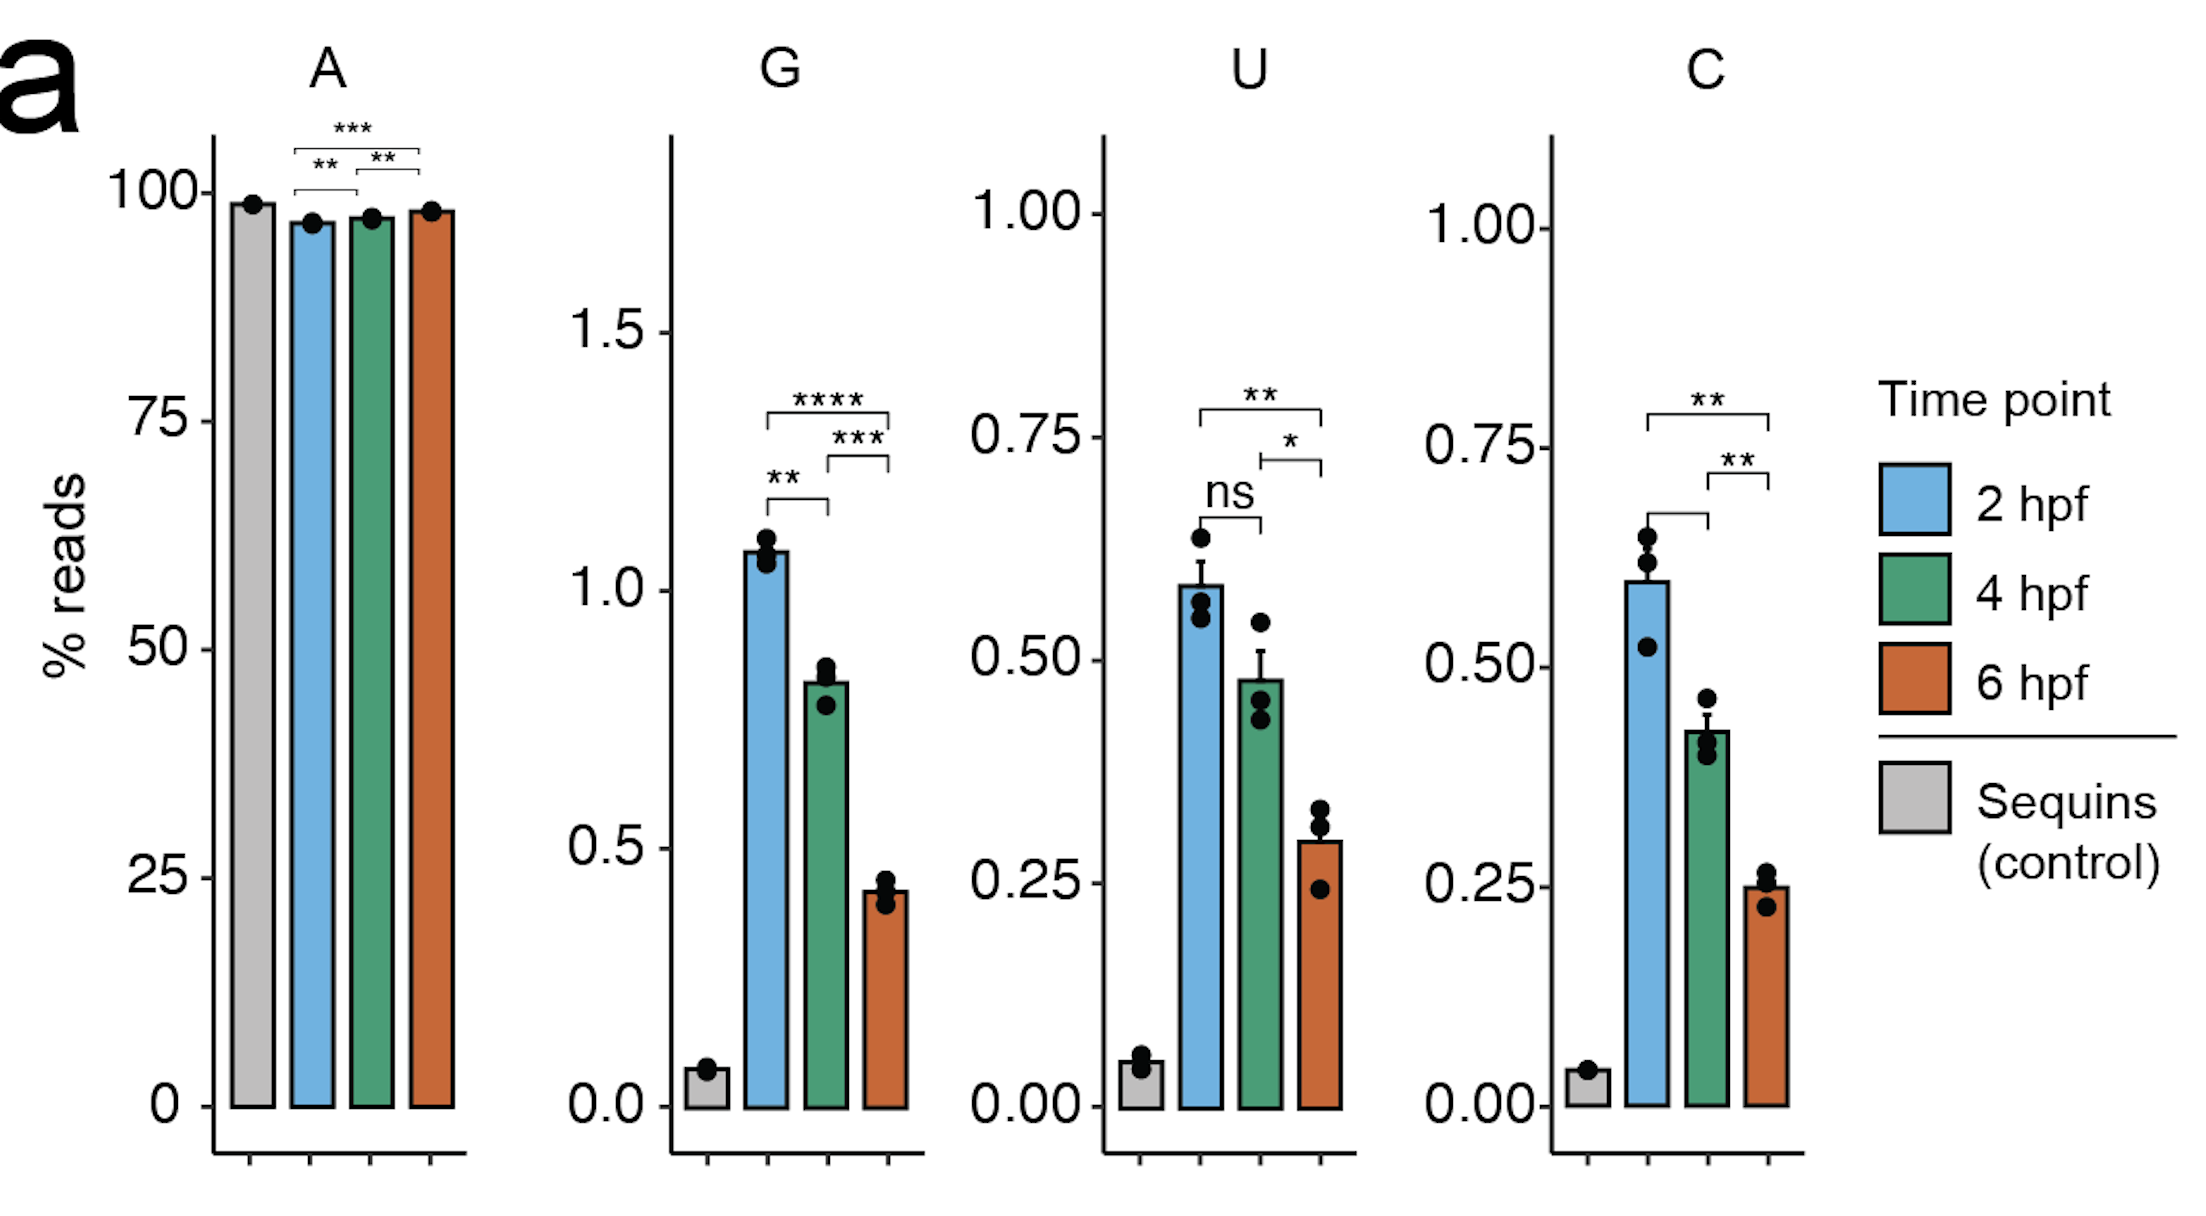

In [81]:
print(cols)

['read_id', 'barcode', 'pt_length', 'per_base', 'pt_start', 'pt_end', 'before_pt', 'pt_seq', 'score', 'identity', 'cigar', 'transcript_end', 'distance', 'transcript_id', 'assignment_type', 'additional_info']


In [105]:
mRNA = set([x for x in df.transcript_end.unique() if type(x)==str and x.endswith('protein_coding')]); len(mRNA)
sel = df.barcode.isin(barcodes)&df.transcript_end.isin(mRNA)&(df.pt_length>=10.)
df[sel].shape

(348124, 16)

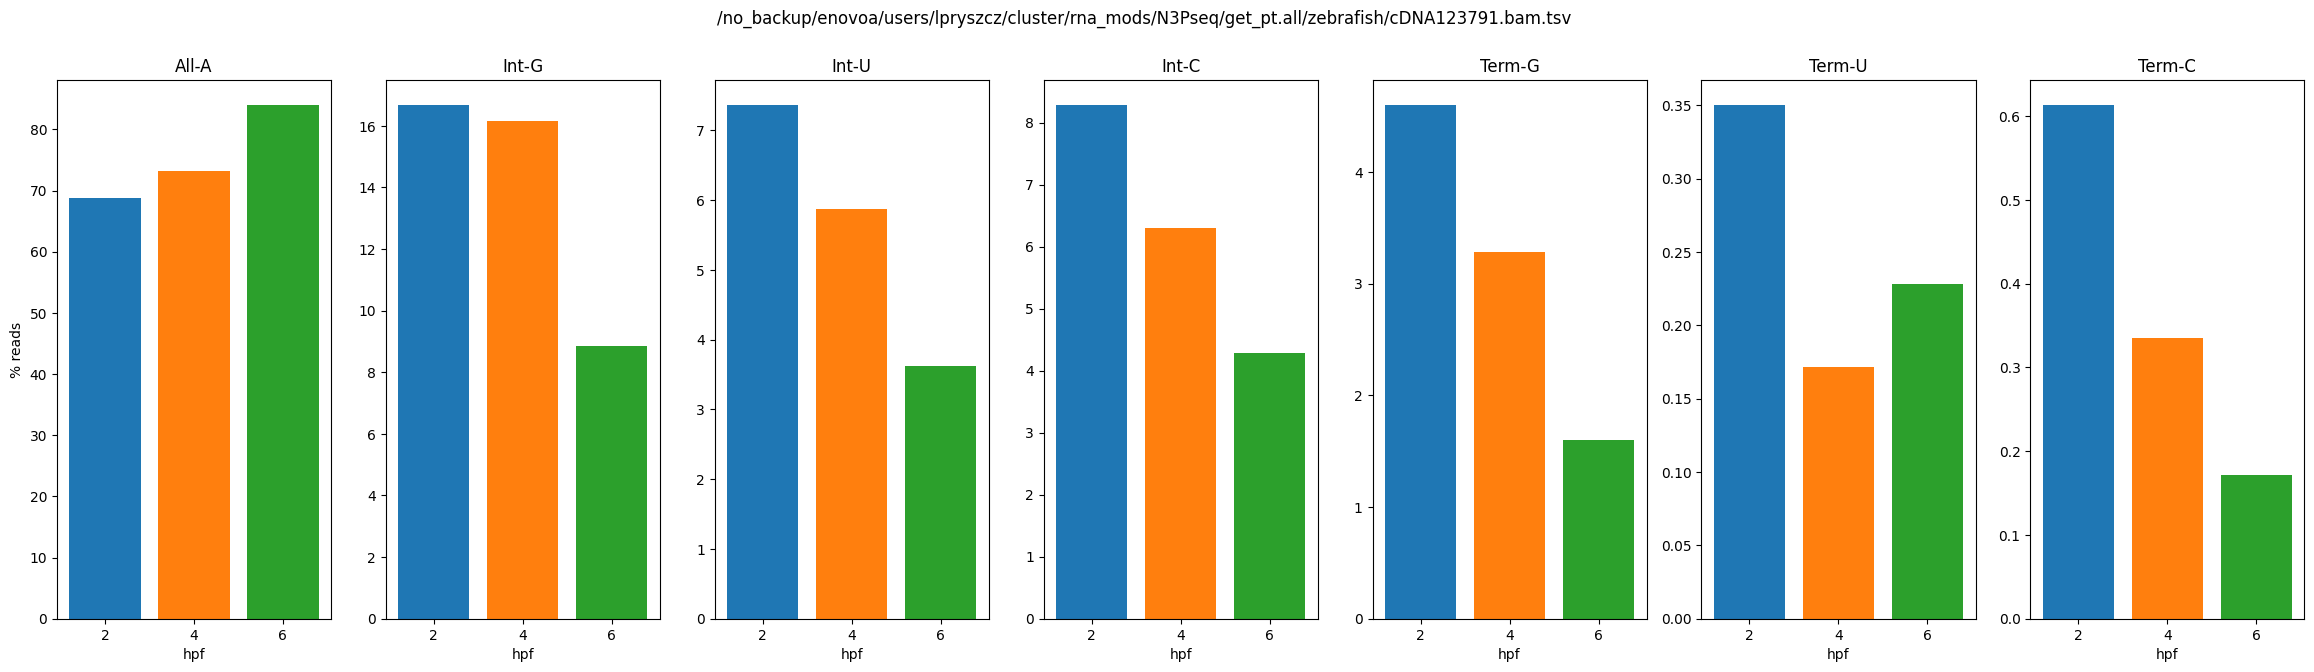

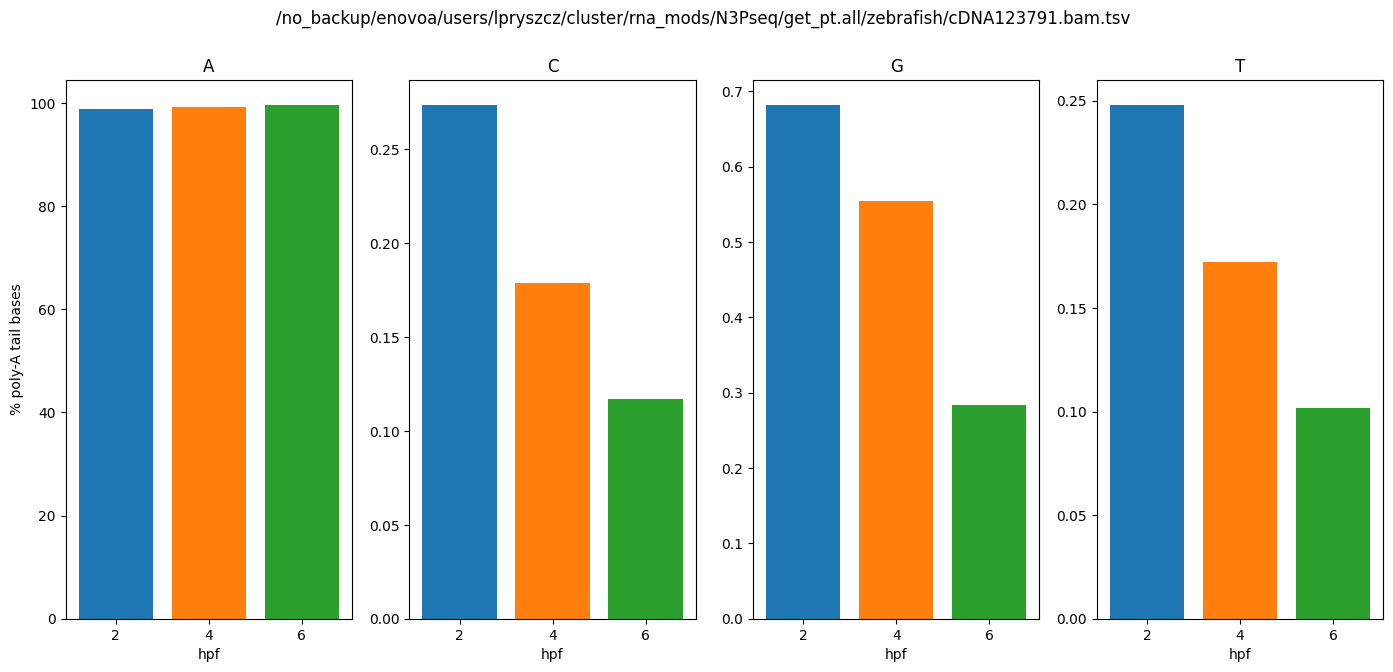

In [205]:
bases = "ACGT"
base2idx = {b: i for i, b in enumerate(bases)}; base2idx
altbase2idx = {'G': 1, 'T': 2, 'C': 3}

def get_data(df, barcodes, feature='protein_coding'):
    mRNA = set([x for x in df.transcript_end.unique() if type(x)==str and x.endswith(feature)]); len(mRNA)
    bc2data = {}
    bc2count = {}
    sel = df.transcript_end.isin(mRNA)&(df.pt_length>=10.)
    for bc in barcodes:
        # Only-A Int-G Int-U Int-C Term-G Term-U Term-C
        counts = np.zeros(7, dtype='int')
        base2count = np.zeros(4, dtype='int')
        tails = df.loc[(df.barcode==bc)&sel, ['before_pt', "pt_seq"]].to_numpy()
        for i, (before, tail) in enumerate(tails, 1):
            #this is needed for older N3PS primer
            if tail.startswith("TTC"): tail = tail[3:]
            seq = mappy.revcomp(tail)
            #this is needed for older N3PS primer
            if before[:-1]=="TCTATCTTC": seq += mappy.revcomp(before[-1])
            #'''
            # count Term
            if seq[-1] in altbase2idx:
                counts[3+altbase2idx[seq[-1]]] += 1
            # count Int
            for b in set(seq[:-1]).difference("A"):
                counts[altbase2idx[b]] += 1
            if len(set(seq))==1:
                counts[0] += 1
            # count all bases
            for b, c in Counter(seq).items(): base2count[base2idx[b]] += c
        bc2data[bc] = (base2count, counts)
        bc2count[bc] = i
    return bc2data, bc2count

def plot_data(bc2data, bc2count, barcodes, fn, xticks = ("2", "4", "6"), 
              titles = ['All-A', 'Int-G', 'Int-U', 'Int-C', 'Term-G', 'Term-U', 'Term-C']):
    colors = sns.color_palette(n_colors=len(barcodes))
    
    data = np.vstack([100.*bc2data[bc][1]/bc2count[bc] for bc in barcodes]); data
    n = len(titles)
    
    fig, axes = plt.subplots(1, n, figsize=(1+4*n, 7))
    for i, ax  in enumerate(axes):
        ax.bar(xticks, data[:, i], color=colors)
        ax.set_title(titles[i])
        ax.set_xlabel("hpf")
        if not i: ax.set_ylabel("% reads")
    fig.suptitle(fn)
    fig.savefig(f"{fn}.composition.pdf")

    data = np.vstack([100.*bc2data[bc][0]/bc2data[bc][0].sum() for bc in barcodes]); data
    n = len(bases)
    fig, axes = plt.subplots(1, n, figsize=(1+4*n, 7))
    for i, ax  in enumerate(axes):
        ax.bar(xticks, data[:, i], color=colors)
        ax.set_title(bases[i])
        ax.set_xlabel("hpf")
        if not i: ax.set_ylabel("% poly-A tail bases")
    fig.suptitle(fn)
    fig.savefig(f"{fn}.bases.pdf")


bc2data, bc2count = get_data(df, barcodes)
plot_data(bc2data, bc2count, barcodes, fn)

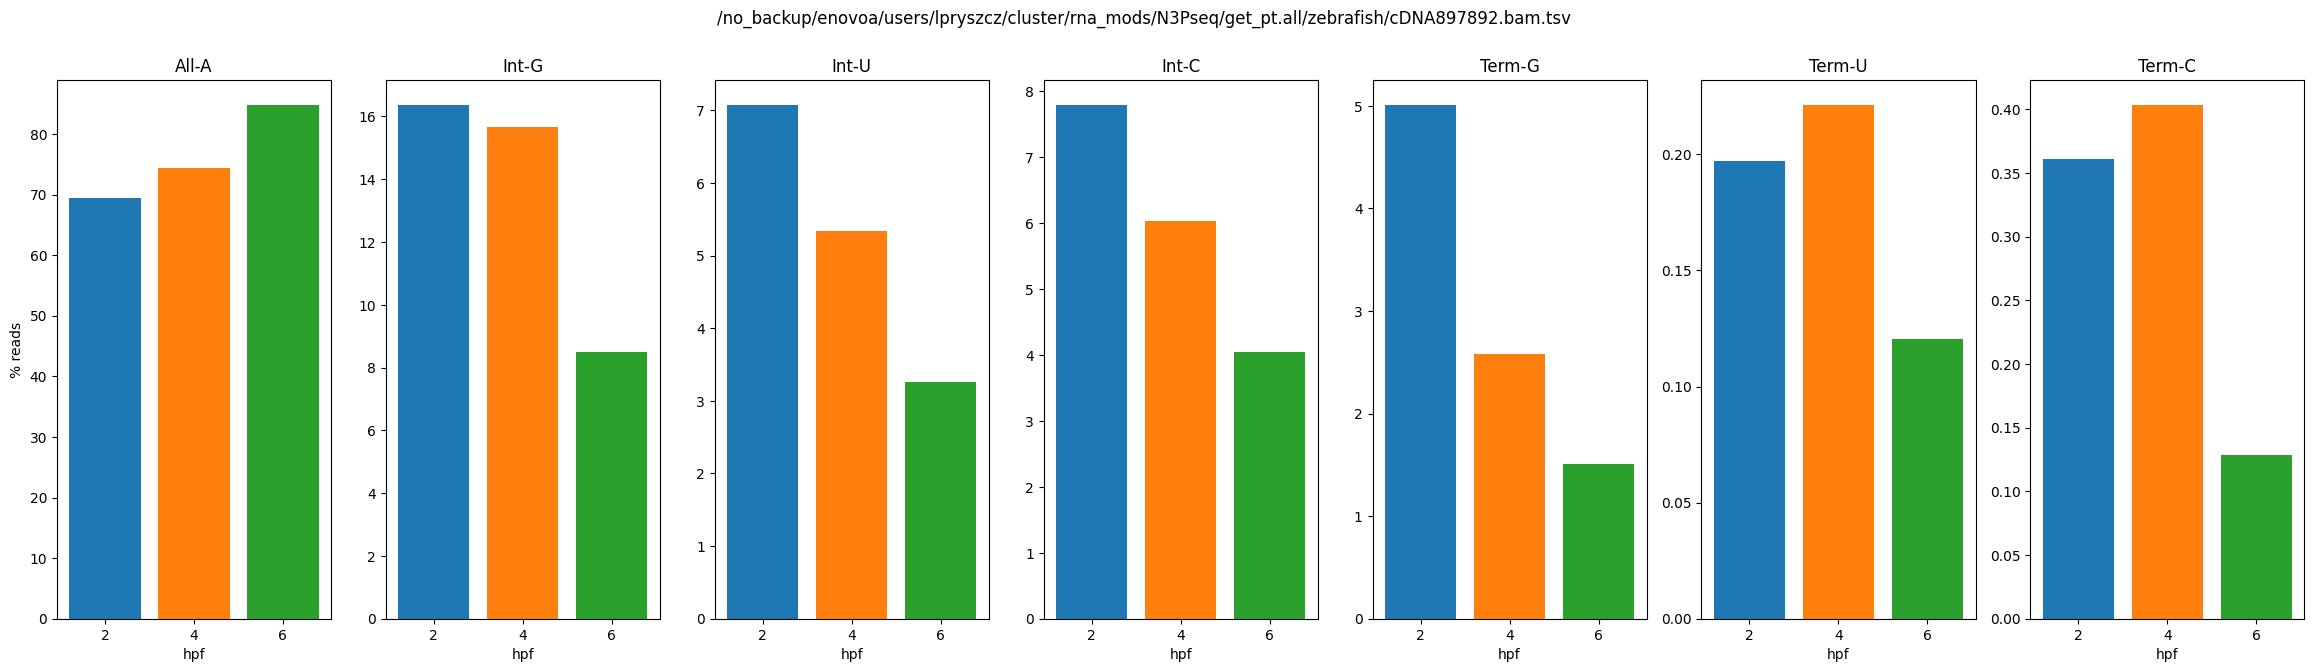

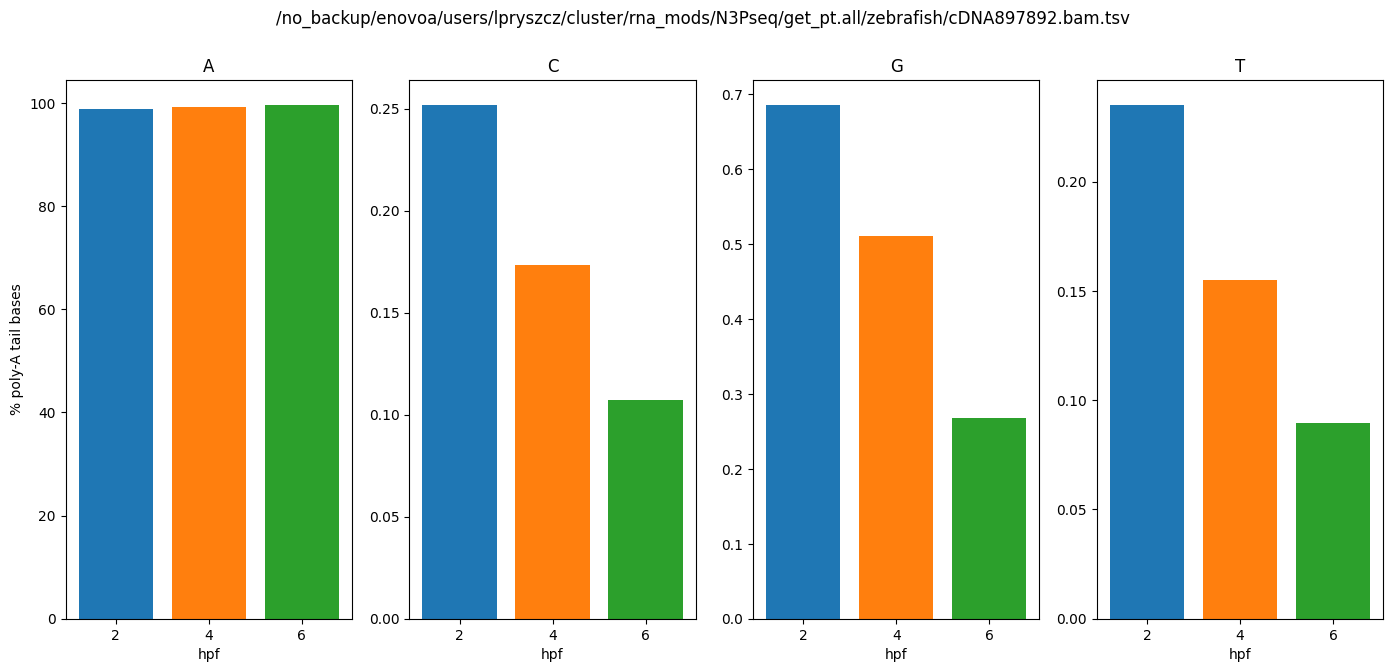

In [206]:
bc2data, bc2count = get_data(df1, barcodes1)
plot_data(bc2data, bc2count, barcodes1, fn1)

### mouse

/tmp/ipykernel_2741564/1851268792.py:4: DtypeWarning: Columns (11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, sep="\t", names=cols, skiprows=1); df.head()


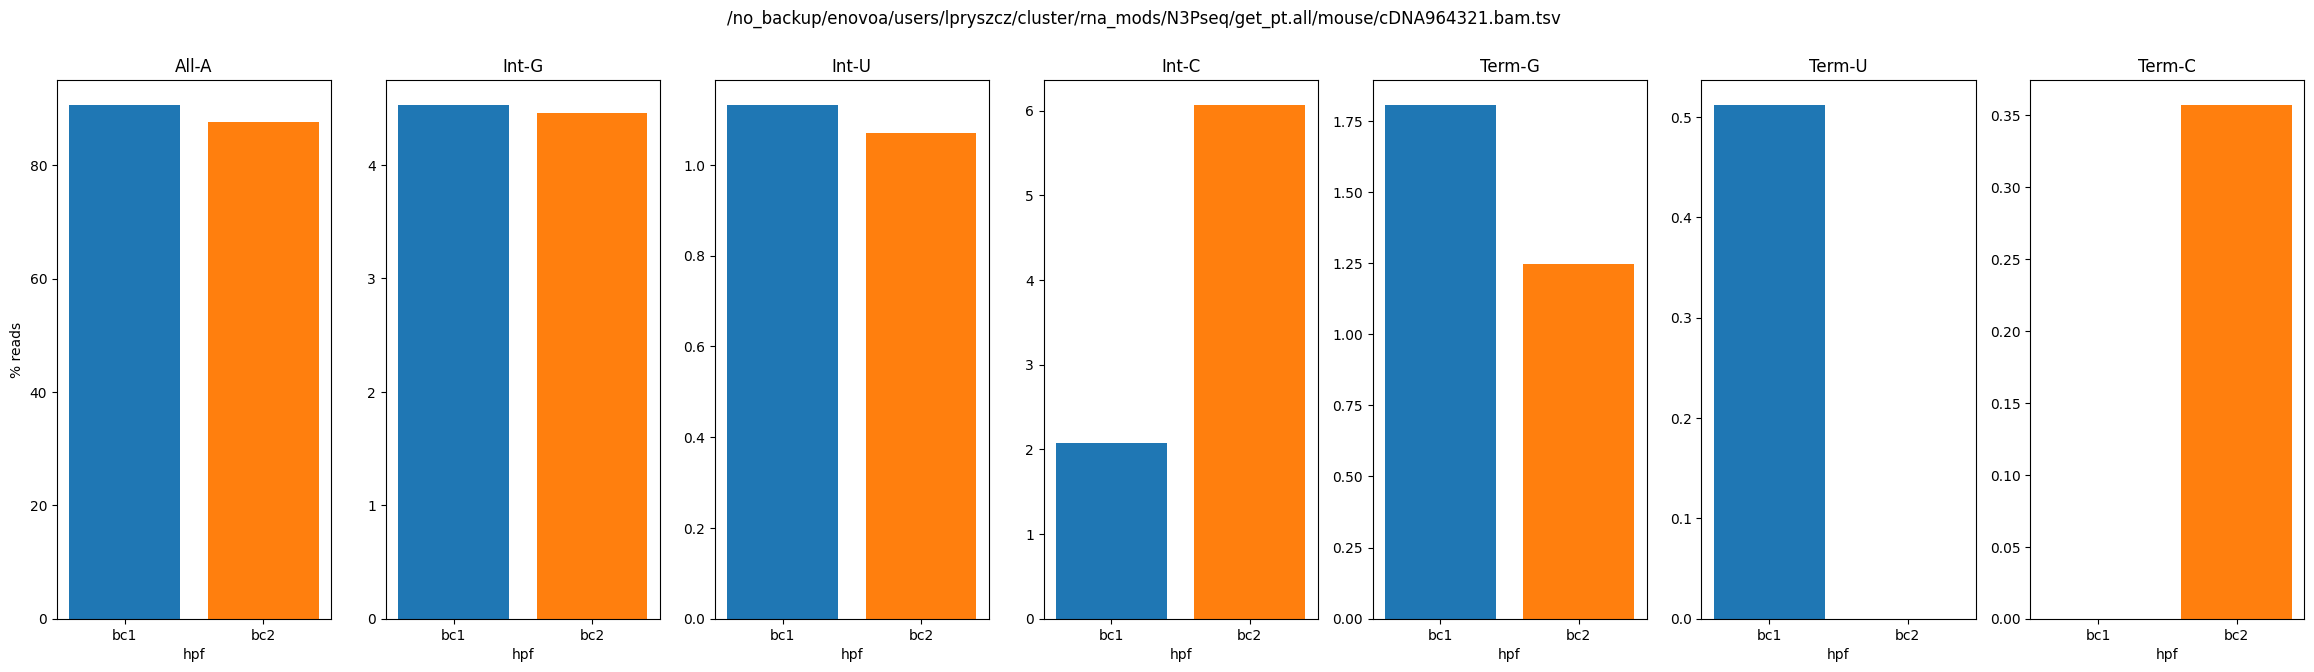

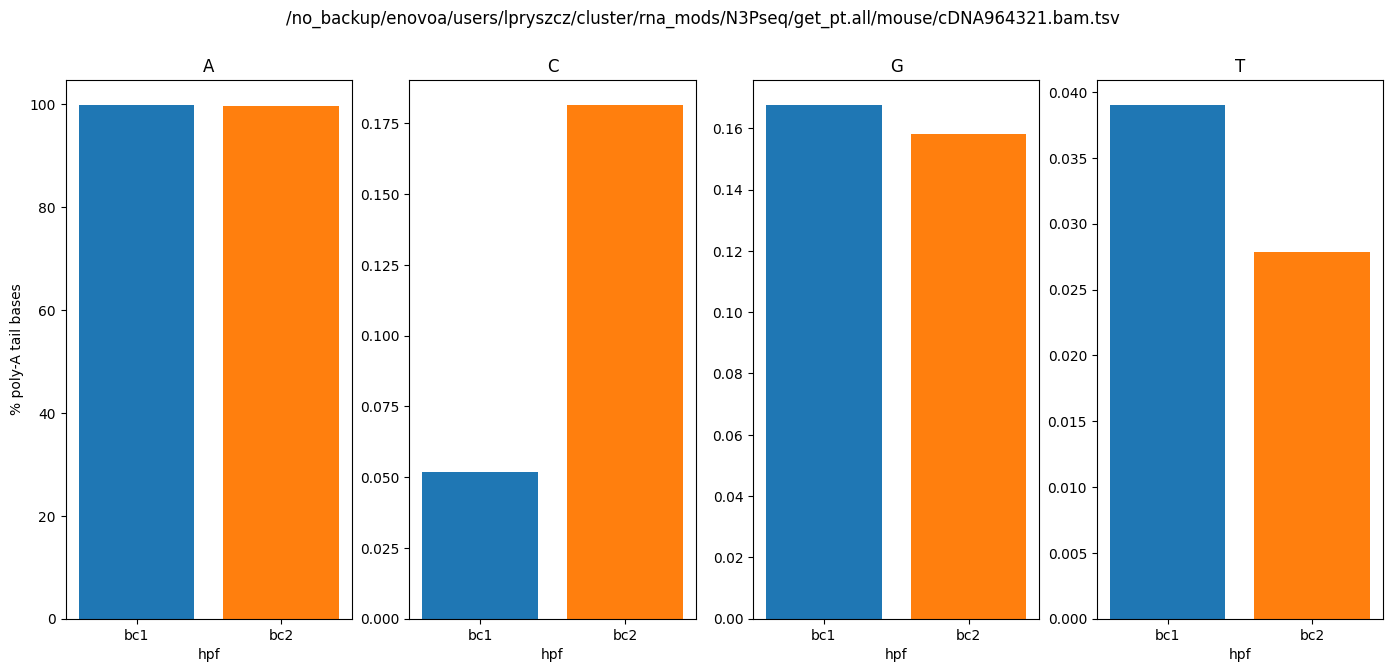

In [212]:
fn = "/no_backup/enovoa/users/lpryszcz/cluster/rna_mods/N3Pseq/get_pt.all/mouse/cDNA964321.bam.tsv"
cols = ['read_id', 'barcode', 'pt_length', 'per_base', 'pt_start', 'pt_end', 'before_pt', 'pt_seq', 'score', 'identity', 'cigar', 
        'transcript_end', 'distance', 'transcript_id', 'assignment_type', 'additional_info']
df = pd.read_csv(fn, sep="\t", names=cols, skiprows=1); df.head()

barcodes = ['EXP-NBD104_barcode01', 'EXP-NBD104_barcode02']

bc2data, bc2count = get_data(df, barcodes)
plot_data(bc2data, bc2count, barcodes, fn, ["bc1", "bc2"])

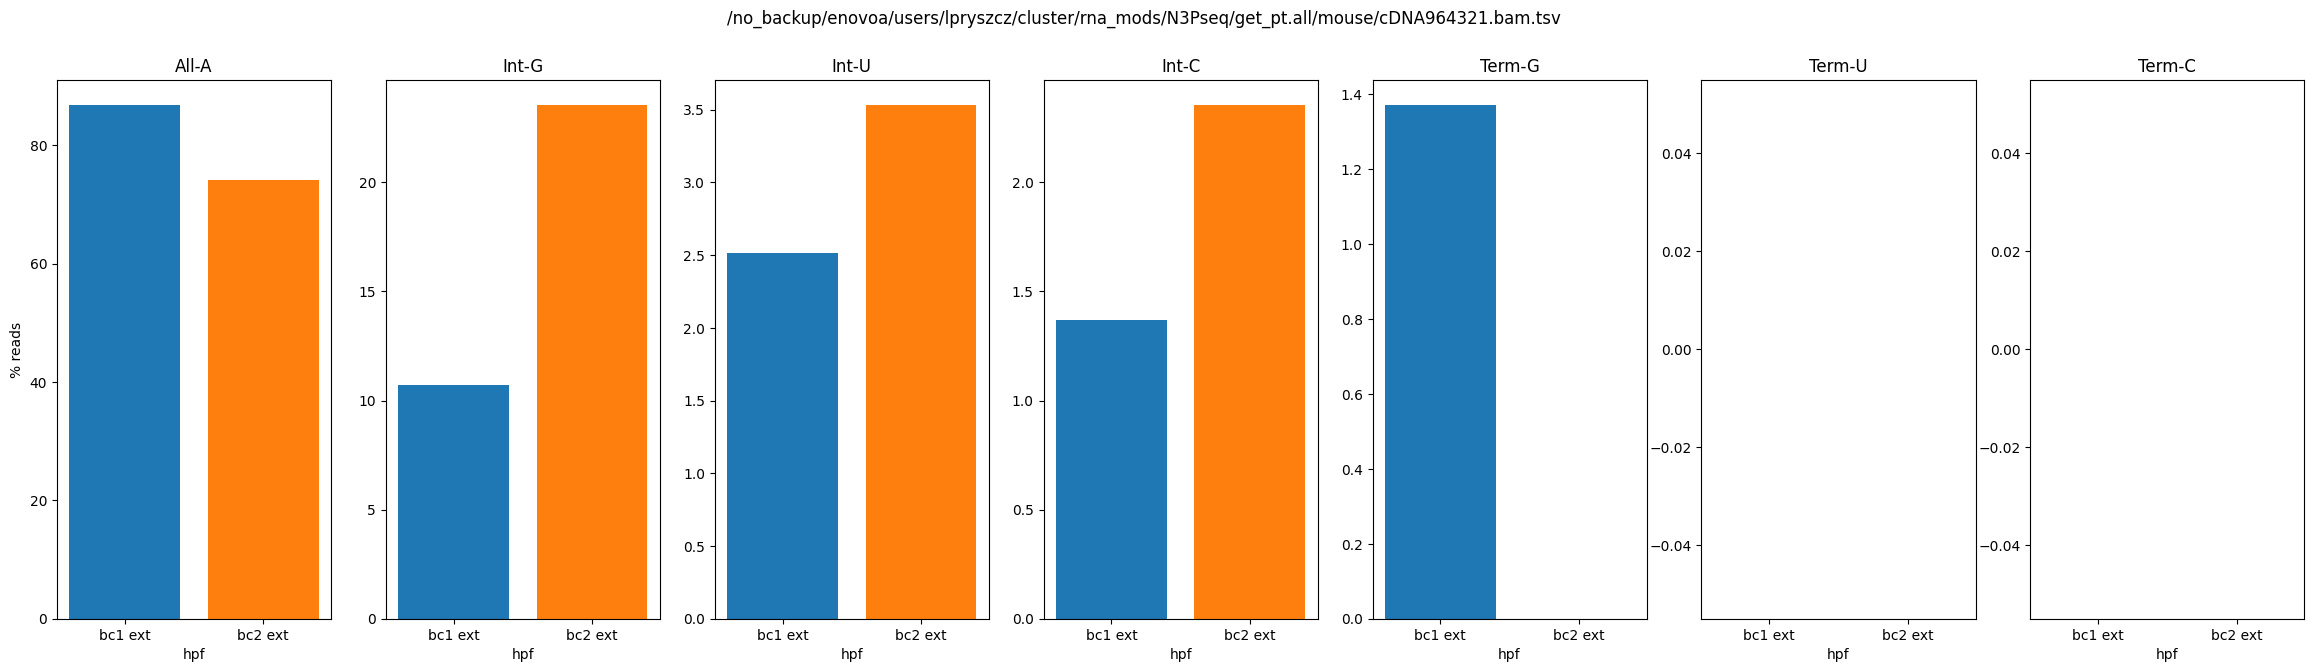

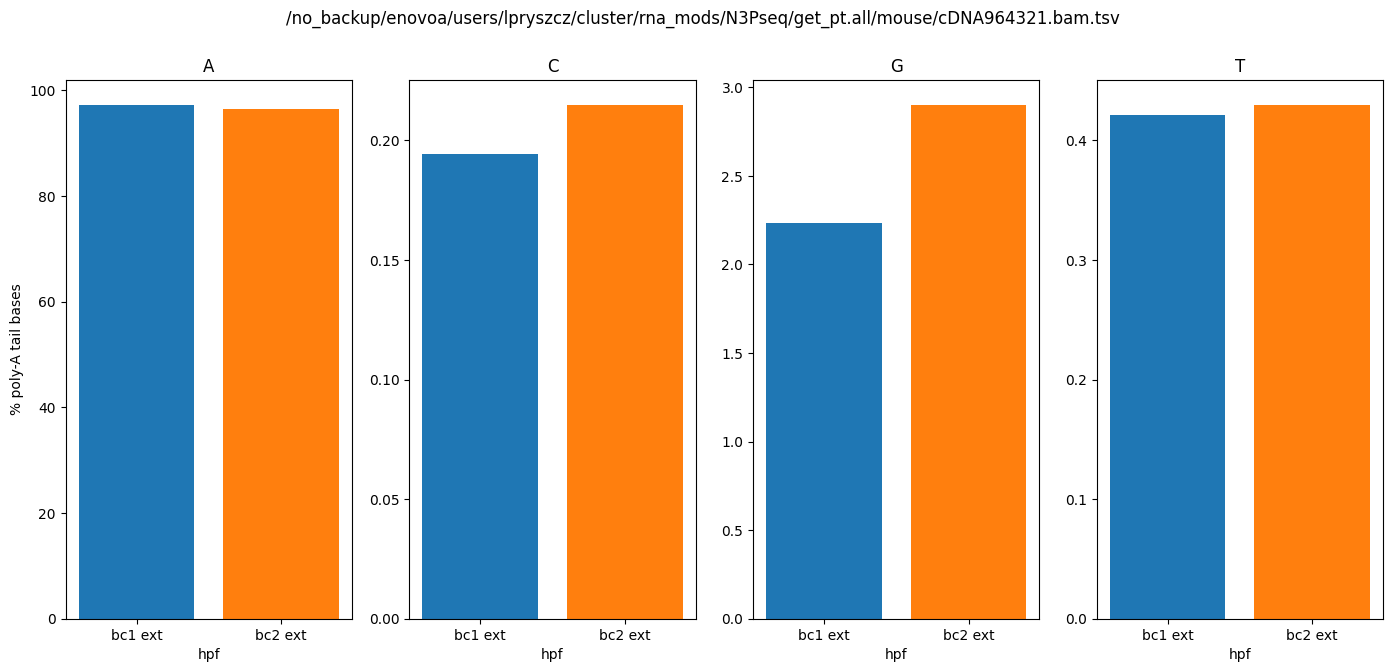

In [216]:
bc2data, bc2count = get_data(df, barcodes, "ext")
plot_data(bc2data, bc2count, barcodes, fn, ["bc1 ext", "bc2 ext"])